#### A study analyzes the data on law school admission, and the goal is to examine the correlation between LSAT score and the first year GPA. For each of 15 law schools, we have the pair of data points (LSAT, GPA) as<br>(576, 3.93), (580, 3.07), (653, 3.12)<br>(635, 3.30), (555, 3.00), (575, 2.74)<br>(558, 2.81), (661, 3.43), (545, 2.76)<br>(578, 3.03), (651, 3.36), (572, 2.88)<br>(666, 3.44), (605, 3.13), (594, 2.96)<br><br> (a)Calculate the correlation coefficient between LSAT and GPA.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [71]:
def get_correlation_coefficient(x, y):
    n = x.shape[0]
    numerator = n*sum(x*y) - sum(x) * sum(y)
    denominator = ((n * sum(x**2) - sum(x)**2 )* ( n * sum(y**2) - sum(y)**2)) ** 0.5
    return numerator/denominator

In [94]:
data = pd.read_csv('admission.csv')
print(data)
lsat = data['LSAT']
gpa = data['GPA']
cc = get_correlation_coefficient(lsat, gpa)
print('Correlation Coefficient =', cc)

    LSAT   GPA
0    576  3.93
1    635  3.30
2    558  2.81
3    578  3.03
4    666  3.44
5    580  3.07
6    555  3.00
7    661  3.43
8    651  3.36
9    605  3.13
10   653  3.12
11   575  2.74
12   545  2.76
13   572  2.88
14   594  2.96
Correlation Coefficient = 0.5230662703149559


#### (b) Pick the programming language of your choice, and use bootstrapping to estimate the standard deviation of the correlation coefficient. Use *B* = 1000 bootstrap resamples. Also plot a histogram of the results (use 20 bins).

Standard Deviation of the correlation coefficient= 0.26598209121944905


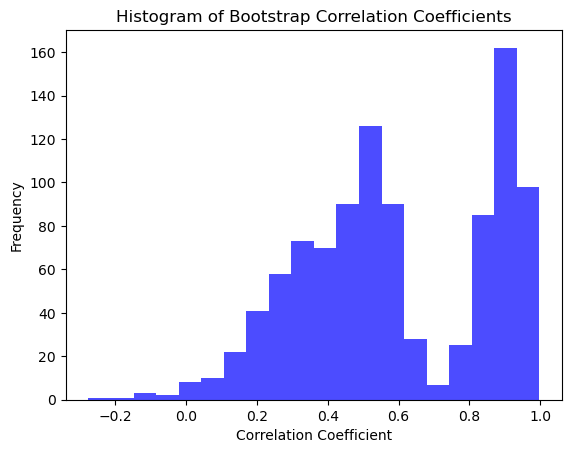

In [96]:
B = 1000
correlations_coefficient = np.zeros(B)
for i in range(B):
    if i == 0:
        correlations_coefficient[0] = cc
        continue

    residBoot = np.random.choice(data.index, size=len(data), replace=True)
    bootstrapSet = data.loc[residBoot]
    # print("~ ~ ~ ~ ~ ~ Set", i ,"~ ~ ~ ~ ~ ~\n", bootstrap_set)
    correlations_coefficient[i] = get_correlation_coefficient(bootstrapSet['LSAT'], bootstrapSet['GPA'])

standard_deviation = np.std(correlations_coefficient)
print('Standard Deviation of the correlation coefficient=', standard_deviation)

# Plot the histogram of the bootstrap correlation coefficients
plt.hist(correlations_coefficient, bins=20, color='blue', alpha=0.7)
plt.title("Histogram of Bootstrap Correlation Coefficients")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.show()